In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import (
    BatchNormalization, Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
)

from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K

In [ ]:

# filename1 = '/content/drive/MyDrive/MNAD-FYP/MADBERT/300kMNAD.h5'
# df = pd.read_hdf(filename1)
# df.head()

In [ ]:
# f = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.csv'
f = filename = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/pure_udata.h5'
df = pd.read_hdf(f)

In [ ]:
df.head(10)

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,213,0,0,0,0,0,0,0,0,0,0,0,0,32,170,0,0,0,0,0,0,0,3,0,0,0,0,221,48,56,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
1,1,214,0,0,0,0,0,0,0,0,0,0,0,0,32,128,0,0,0,0,0,0,0,0,0,0,0,0,221,48,0,1,0,0,0,0,0,0,1,1,0,6,0,221,0,0,0,0,0,1,0,129,0,0,0,0,BENIGN
2,2,214,0,0,0,0,0,0,0,0,0,0,0,0,32,129,0,0,0,0,0,0,0,0,0,0,0,0,221,48,1,1,0,0,0,0,0,0,1,1,0,6,0,221,0,0,0,0,0,1,0,129,0,0,0,0,BENIGN
3,3,179,0,0,0,0,0,0,0,0,0,0,0,0,32,131,0,0,0,0,0,0,0,0,0,0,0,0,221,48,2,1,0,0,0,0,0,0,1,1,0,6,0,221,0,0,0,0,0,1,0,129,0,0,0,0,BENIGN
4,4,213,0,0,0,0,0,0,0,0,0,0,0,0,32,170,0,0,0,0,0,0,0,3,0,0,0,0,221,48,56,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
5,5,213,0,0,0,0,0,0,0,0,0,0,0,0,32,127,0,0,0,0,0,0,0,254,0,0,0,0,221,48,0,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
6,6,213,0,0,0,0,0,0,0,0,0,0,0,0,32,159,0,0,0,0,0,0,0,4,0,0,0,0,221,48,42,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
7,7,213,0,0,0,0,0,0,0,0,0,0,0,0,32,130,0,0,0,0,0,0,0,0,0,0,0,0,221,48,2,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,1,0,129,0,0,0,0,BENIGN
8,8,36,0,0,0,0,0,0,0,0,0,0,0,0,32,159,0,0,0,0,0,0,0,4,0,0,0,0,221,48,42,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
9,9,214,0,0,0,0,0,0,0,0,0,0,0,0,33,159,0,0,0,0,0,0,0,4,0,0,0,255,221,48,42,1,0,1,0,0,0,0,1,0,2,18,0,221,0,0,0,0,3,0,0,129,0,0,0,0,BENIGN


In [ ]:
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 56 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0    Destination Port            uint8 
 1    Flow Duration               uint8 
 2    Total Fwd Packets           uint8 
 3    Total Backward Packets      uint8 
 4   Total Length of Fwd Packets  uint8 
 5    Fwd Packet Length Max       uint8 
 6    Fwd Packet Length Min       uint8 
 7    Fwd Packet Length Mean      uint8 
 8    Fwd Packet Length Std       uint8 
 9   Bwd Packet Length Max        uint8 
 10   Bwd Packet Length Min       uint8 
 11   Bwd Packet Length Mean      uint8 
 12   Bwd Packet Length Std       uint8 
 13  Flow Bytes/s                 uint8 
 14   Flow Packets/s              uint8 
 15   Flow IAT Mean               uint8 
 16   Flow IAT Std                uint8 
 17   Flow IAT Max                uint8 
 18   Flow IAT Min                uint8 
 19  Fwd IAT Total        

In [ ]:
df[' Label'].value_counts()

# filename = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.h5'
# df.to_hdf(filename, 'data', mode='w', format='table')
# 
# f = '/content/drive/MyDrive/MNAD-FYP/MachineLearningCVE/Dataset-Analysis/all_data.h5'
# df = pd.read_hdf(f)

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [ ]:
df.shape

(2827876, 56)

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,213,0,0,0,0,0,0,0,0,0,0,0,0,32,170,0,0,0,0,0,0,0,3,0,0,0,0,221,48,56,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN
1,214,0,0,0,0,0,0,0,0,0,0,0,0,32,128,0,0,0,0,0,0,0,0,0,0,0,0,221,48,0,1,0,0,0,0,0,0,1,1,0,6,0,221,0,0,0,0,0,1,0,129,0,0,0,0,BENIGN
2,214,0,0,0,0,0,0,0,0,0,0,0,0,32,129,0,0,0,0,0,0,0,0,0,0,0,0,221,48,1,1,0,0,0,0,0,0,1,1,0,6,0,221,0,0,0,0,0,1,0,129,0,0,0,0,BENIGN
3,179,0,0,0,0,0,0,0,0,0,0,0,0,32,131,0,0,0,0,0,0,0,0,0,0,0,0,221,48,2,1,0,0,0,0,0,0,1,1,0,6,0,221,0,0,0,0,0,1,0,129,0,0,0,0,BENIGN
4,213,0,0,0,0,0,0,0,0,0,0,0,0,32,170,0,0,0,0,0,0,0,3,0,0,0,0,221,48,56,1,0,0,0,0,0,0,1,0,0,6,0,221,0,0,0,0,0,0,0,129,0,0,0,0,BENIGN


In [68]:
nb_epoch = 200
batch_size = 128
# input_dim = df_train_0_x_rescaled.shape[1] #num of predictor variables, 
# encoding_dim = 32
# hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3
input_layer = Input(shape=(55 ))

def encoder(input_layer):
   
  encoder1 = Dense(70, activation="relu")(input_layer)
  encoder1 = BatchNormalization()(encoder1)

  encoder2 = Dense(60, activation="relu")(encoder1)
  encoder2 = BatchNormalization()(encoder2)

  encoder3 = Dense(50, activation="relu")(encoder2)
  encoder3 = BatchNormalization()(encoder3)

  encoder4 = Dense(40, activation="relu")(encoder3)
  encoder4 = BatchNormalization()(encoder4)

  encoder5 = Dense(30, activation="relu")(encoder4)
  encoder5 = BatchNormalization()(encoder5)

  encoder6 = Dense(20, activation="relu")(encoder5)
  encoder6 = BatchNormalization()(encoder6)
  
  encoder7 = Dense(10, activation="relu")(encoder6)
  encoder7 = BatchNormalization()(encoder7)

  return encoder7

def decoder(encoder7):
  decoder1 = Dense(20, activation="relu")(encoder7)
  decoder1 = BatchNormalization()(decoder1)

  decoder2 = Dense(30, activation="relu")(decoder1)
  decoder2 = BatchNormalization()(decoder2)

  decoder3 = Dense(40, activation="relu")(decoder2)
  decoder3 = BatchNormalization()(decoder3)

  decoder4 = Dense(50, activation="relu")(decoder3)
  decoder4 = BatchNormalization()(decoder4)

  decoder5 = Dense(60, activation="relu")(decoder4)
  decoder5 = BatchNormalization()(decoder5)

  decoder6 = Dense(70, activation="relu")(decoder5)
  decoder6 = BatchNormalization()(decoder6)
# decoder7 = Dense(input_dim, activation="linear")(decoder6)

# up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
#     decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
#     return decoded

  decoder7 = Dense(55, activation="linear")(decoder6)
  decoder7 = BatchNormalization()(decoder7)
  # autoencoder = Model(inputs=input_layer, outputs=decoder)
  # autoencoder = Model(inputs=input_layer, outputs=decoder)
  return decoder7



In [69]:
autoencoder = Model(input_layer, decoder(encoder(input_layer)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 55)]              0         
_________________________________________________________________
dense_66 (Dense)             (None, 70)                3920      
_________________________________________________________________
batch_normalization_14 (Batc (None, 70)                280       
_________________________________________________________________
dense_67 (Dense)             (None, 60)                4260      
_________________________________________________________________
batch_normalization_15 (Batc (None, 60)                240       
_________________________________________________________________
dense_68 (Dense)             (None, 50)                3050      
_________________________________________________________________
batch_normalization_16 (Batc (None, 50)                200 

In [70]:
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [ ]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

target = df[' Label']
le = LabelEncoder()
target = le.fit_transform(target)

In [ ]:
# X = X.apply(lambda col: (col.astype('float16')))
X=df.iloc[:,:-1]
X.info()
X.head(15)

In [36]:
X.shape, target.shape

((2827876, 55), (2827876,))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# train_dataset, temp_test_dataset = train_test_split(df, test_size = 0.30)
# test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size = 0.5)
# train_dataset.shape, temp_test_dataset.shape, test_dataset.shape, valid_dataset.shape
# test_dataset.sample(10)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))

(2262300, 55) 2262300 (565576, 55) 565576


In [60]:
print(x_train.shape, x_test.shape)
y_train.shape, y_test.shape 
# y_test[0][0]

(2262300, 55) (565576, 55)


((2262300,), (565576,))

In [46]:
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [71]:
autoencoder_train = autoencoder.fit(x_train,y_train, 
                                    batch_size=batch_size,
                                    epochs=nb_epoch,
                                    verbose=1,
                                    validation_data=(x_test, y_test))



Epoch 1/200
17675/17675 [==============================] - 157s 5ms/step - loss: 0.9964 - val_loss: 0.5597
Epoch 2/200
17675/17675 [==============================] - 91s 5ms/step - loss: 0.6344 - val_loss: 0.4458
Epoch 3/200
17675/17675 [==============================] - 91s 5ms/step - loss: 0.6207 - val_loss: 0.4571
Epoch 4/200
17675/17675 [==============================] - 87s 5ms/step - loss: 0.5606 - val_loss: 0.3380
Epoch 5/200
17675/17675 [==============================] - 92s 5ms/step - loss: 0.5121 - val_loss: 0.6308
Epoch 6/200
17675/17675 [==============================] - 92s 5ms/step - loss: 0.4933 - val_loss: 0.3462
Epoch 7/200
17675/17675 [==============================] - 91s 5ms/step - loss: 0.4845 - val_loss: 0.3375
Epoch 8/200
17675/17675 [==============================] - 87s 5ms/step - loss: 0.4703 - val_loss: 0.3228
Epoch 9/200
17675/17675 [==============================] - 93s 5ms/step - loss: 0.4584 - val_loss: 0.2915
Epoch 10/200
17675/17675 [===================

In [38]:
# autoencoder.compile(metrics=['accuracy'],
#                     loss='mean_squared_error',
#                     optimizer='adam')
# cp = ModelCheckpoint(filepath="MNAD-autoencoder_classifier.h5",
#                                save_best_only=True,
#                                verbose=0)

# tb = TensorBoard(log_dir='./logs',
#                 histogram_freq=0,
#                 write_graph=True,
#                 write_images=True)
                               
# history = autoencoder.fit(train_dataset,
# epochs=10,
# batch_size=batch_size,
# shuffle=True,
# validation_data=(test_dataset),
# verbose=1,
# callbacks=[cp, tb]).history

In [73]:
autoencoder.save_weights('/content/drive/MyDrive/7th- Semester/FashionMNIST/1MNADautoencoder.h5')
# '/content/drive/MyDrive/7th- Semester/FashionMNIST/t10k-labels-idx1-ubyte.gz',10000)

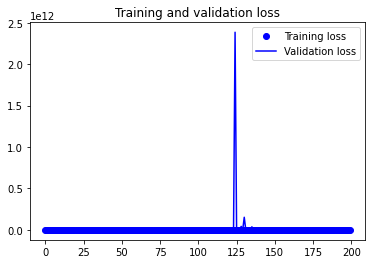

In [72]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(200)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 42)


In [75]:
from tensorflow.keras.utils import to_categorical # Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train) 
test_Y_one_hot = to_categorical(y_test)

In [101]:
nb_epoch = 200
batch_size = 128
# input_dim = df_train_0_x_rescaled.shape[1] #num of predictor variables, 
# encoding_dim = 32
# hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3
input_layer = Input(shape=(55 ))

def encoder(input_layer):
   
  encoder1 = Dense(70, activation="relu")(input_layer)
  encoder1 = BatchNormalization()(encoder1)

  encoder2 = Dense(60, activation="relu")(encoder1)
  encoder2 = BatchNormalization()(encoder2)

  encoder3 = Dense(50, activation="relu")(encoder2)
  encoder3 = BatchNormalization()(encoder3)

  encoder4 = Dense(40, activation="relu")(encoder3)
  encoder4 = BatchNormalization()(encoder4)

  encoder5 = Dense(30, activation="relu")(encoder4)
  encoder5 = BatchNormalization()(encoder5)

  encoder6 = Dense(20, activation="relu")(encoder5)
  encoder6 = BatchNormalization()(encoder6)
  
  encoder7 = Dense(10, activation="relu")(encoder6)
  encoder7 = BatchNormalization()(encoder7)

  return encoder7

In [96]:
full_model.layers

In [102]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(15, activation='softmax')(den)
    return out

encode = encoder(input_layer)
full_model = Model(input_layer,fc(encode))

for l1,l2 in zip(full_model.layers[:10],autoencoder.layers[0:10]):
    l1.set_weights(l2.get_weights())

In [103]:
autoencoder.get_weights()[0][1]

array([-6.91767633e-01, -1.42938876e+00, -9.15879250e+00,  5.02667725e-01,
       -4.59136754e-01, -1.91909909e-01, -3.70410293e-01, -1.09591089e-01,
       -2.03493074e-01, -2.19275799e+01, -5.29524684e-02,  1.75487959e+00,
       -4.85659152e-01, -1.31464386e+00,  5.48846066e-01,  1.99271679e-01,
       -9.31533948e-02, -5.27369916e-01,  5.29194176e-01, -2.02974129e+00,
       -5.58402419e-01,  8.96083415e-02, -2.84534264e+00,  4.11202610e-01,
       -8.17105830e-01,  7.07773149e-01, -4.06331234e-02,  3.07630658e-01,
       -3.66916806e-02, -1.18307486e-01,  1.21080017e+00,  7.13586360e-02,
       -1.90082192e-03, -1.11489487e+00, -2.50084907e-01, -4.15610909e-01,
        9.93418768e-02, -3.02211738e+00, -1.64441913e-01,  4.39830031e-03,
       -1.40933961e-01, -6.28853291e-02, -4.96179074e-01, -8.62860531e-02,
       -2.34327853e-01, -1.27282189e-02, -1.17022134e-02,  1.47465670e+00,
       -2.02432126e-01, -6.04608804e-02, -2.13749096e-01, -1.12860680e+00,
        1.04193187e+00,  

In [104]:
full_model.get_weights()[0][1]

array([-6.91767633e-01, -1.42938876e+00, -9.15879250e+00,  5.02667725e-01,
       -4.59136754e-01, -1.91909909e-01, -3.70410293e-01, -1.09591089e-01,
       -2.03493074e-01, -2.19275799e+01, -5.29524684e-02,  1.75487959e+00,
       -4.85659152e-01, -1.31464386e+00,  5.48846066e-01,  1.99271679e-01,
       -9.31533948e-02, -5.27369916e-01,  5.29194176e-01, -2.02974129e+00,
       -5.58402419e-01,  8.96083415e-02, -2.84534264e+00,  4.11202610e-01,
       -8.17105830e-01,  7.07773149e-01, -4.06331234e-02,  3.07630658e-01,
       -3.66916806e-02, -1.18307486e-01,  1.21080017e+00,  7.13586360e-02,
       -1.90082192e-03, -1.11489487e+00, -2.50084907e-01, -4.15610909e-01,
        9.93418768e-02, -3.02211738e+00, -1.64441913e-01,  4.39830031e-03,
       -1.40933961e-01, -6.28853291e-02, -4.96179074e-01, -8.62860531e-02,
       -2.34327853e-01, -1.27282189e-02, -1.17022134e-02,  1.47465670e+00,
       -2.02432126e-01, -6.04608804e-02, -2.13749096e-01, -1.12860680e+00,
        1.04193187e+00,  

In [105]:
for layer in full_model.layers[0:10]:
    layer.trainable = False

In [140]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['mse','mae', 'accuracy'])
# loss='mean_squared_error', optimizer = RMSprop()

# loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine', 'Accuracy']

In [ ]:
full_model.summary()

In [120]:
# Change the labels from categorical to one-hot encoding
from tensorflow.keras.utils import to_categorical # Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train) 
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [126]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
# classify_train = full_model.fit(x_train, y_train, batch_size=64,epochs=50,verbose=1,validation_data=(x_test, y_test))
classify_train = full_model.fit(x_train,train_Y_one_hot, 
                                    batch_size=batch_size,
                                    epochs=50,
                                    verbose=1,
                                    validation_data=(x_test, test_Y_one_hot))

# classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=50,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/50
 2891/17675 [===>..........................] - ETA: 7:41 - loss: 0.0173 - mse: 5.7308e-04 - mae: 0.0011 - accuracy: 0.9943

In [116]:
print(x_train.shape, y_train.shape)
x_test.shape, y_test.shape

(2262300, 55) (2262300,)


((565576, 55), (565576,))